In [1]:
import pandas as pd
import numpy as np


In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags= pd.read_csv('tags.csv')
links= pd.read_csv('links.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies_rating = movies.merge(ratings, on='movieId', how='inner')
movies_rating.head(2)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962


In [5]:
movies_rating.groupby('title')['rating'].count().sort_values()

title
'71 (2014)                                                                          1
Latter Days (2003)                                                                  1
Late Shift, The (1996)                                                              1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Night Shopping (2001)                                                          1
                                                                                 ... 
Matrix, The (1999)                                                                278
Silence of the Lambs, The (1991)                                                  279
Pulp Fiction (1994)                                                               307
Shawshank Redemption, The (1994)                                                  317
Forrest Gump (1994)                                                               329
Name: rating, Length: 9719, dtype: int64

In [6]:
movies_rating_tags = movies_rating.merge(tags, on=['movieId','userId'], how='inner')
movies_rating_tags.head(2)

,movieId,title,genres,userId,rating,timestamp_x,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,4.0,1122227329,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,4.0,978575760,pixar,1137206825


In [7]:
matrix= movies_rating_tags[movies_rating_tags.title == 'Matrix, The (1999)']['tag']
matrix

1240          martial arts
1241                sci-fi
1242    alternate universe
1243            philosophy
1244      post apocalyptic
Name: tag, dtype: object

In [8]:
Terminator= movies_rating_tags[movies_rating_tags.title == 'Terminator 2: Judgment Day (1991)']['rating'].mean()
Terminator

2.625

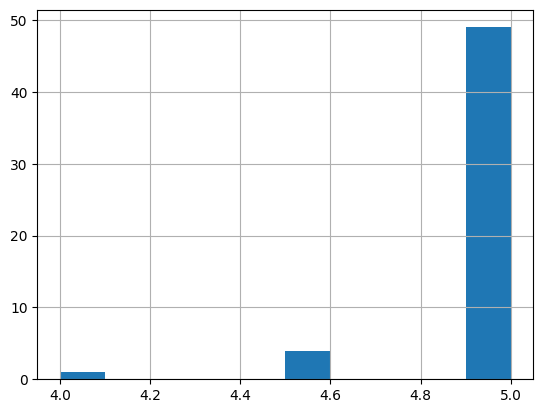

In [9]:
fight_club= movies_rating_tags[movies_rating_tags.title == 'Fight Club (1999)']['rating']
fight_club.hist();

In [10]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
ratings_mean_count = ratings.groupby('movieId')['rating'].agg([np.mean,np.count_nonzero])
ratings_mean_count.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_8524\3928410584.py:1: FutureWarning: The provided callable <function mean at 0x000001F1556E7740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ratings_mean_count = ratings.groupby('movieId')['rating'].agg([np.mean,np.count_nonzero])


,mean,count_nonzero
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


In [12]:
movie_ratings_mean_count = ratings_mean_count.merge(movies, on='movieId', how='inner')
movie_ratings_mean_count.head()

,movieId,mean,count_nonzero,title,genres
0,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.259615,52,Grumpier Old Men (1995),Comedy|Romance
3,4,2.357143,7,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.071429,49,Father of the Bride Part II (1995),Comedy


In [13]:

movie_ratings_50 = movie_ratings_mean_count[movie_ratings_mean_count['count_nonzero'] >50 ]
movie_ratings_50.head()

,movieId,mean,count_nonzero,title,genres
0,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.259615,52,Grumpier Old Men (1995),Comedy|Romance
5,6,3.946078,102,Heat (1995),Action|Crime|Thriller
6,7,3.185185,54,Sabrina (1995),Comedy|Romance


In [14]:
movie_ratings_scifi = movie_ratings_50[movie_ratings_50['genres'].str.contains('Sci-Fi')]
movie_ratings_scifi.sort_values('count_nonzero',ascending=False).head()

,movieId,mean,count_nonzero,title,genres
1938,2571,4.192446,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller
224,260,4.231076,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
418,480,3.750000,238,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
507,589,3.970982,224,Terminator 2: Judgment Day (1991),Action|Sci-Fi
897,1196,4.215640,211,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi


In [15]:
movie_ratings_50_imdb = movie_ratings_50.merge(links, on='movieId', how='inner')
movie_ratings_50_imdb.head()

,movieId,mean,count_nonzero,title,genres,imdbId,tmdbId
0,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,3.259615,52,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,6,3.946078,102,Heat (1995),Action|Crime|Thriller,113277,949.0
4,7,3.185185,54,Sabrina (1995),Comedy|Romance,114319,11860.0


In [16]:
movie_ratings_50_imdb['imdbId_link'] = 'http://www.imdb.com/title/tt0' + movie_ratings_50_imdb['imdbId'].astype(str)
movie_ratings_50_imdb.head()

,movieId,mean,count_nonzero,title,genres,imdbId,tmdbId,imdbId_link
0,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,http://www.imdb.com/title/tt0114709
1,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,http://www.imdb.com/title/tt0113497
2,3,3.259615,52,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,http://www.imdb.com/title/tt0113228
3,6,3.946078,102,Heat (1995),Action|Crime|Thriller,113277,949.0,http://www.imdb.com/title/tt0113277
4,7,3.185185,54,Sabrina (1995),Comedy|Romance,114319,11860.0,http://www.imdb.com/title/tt0114319


In [18]:
import requests
from bs4 import BeautifulSoup

In [19]:
response = requests.get('http://www.imdb.com/title/tt0114709/')
response

<Response [403]>

In [20]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

In [24]:
movie_ratings_50_imdb['imdbId_rating'] = movie_ratings_50_imdb['imdbId'].apply(scrapper)

In [27]:
movie_ratings_50_imdb.head()

,movieId,mean,count_nonzero,title,genres,imdbId,tmdbId,imdbId_link,imdbId_rating
0,1,3.920930,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,http://www.imdb.com/title/tt0114709,8.3
1,2,3.431818,110,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,http://www.imdb.com/title/tt0113497,7.1
2,3,3.259615,52,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,http://www.imdb.com/title/tt0113228,6.6
3,6,3.946078,102,Heat (1995),Action|Crime|Thriller,113277,949.0,http://www.imdb.com/title/tt0113277,8.3
4,7,3.185185,54,Sabrina (1995),Comedy|Romance,114319,11860.0,http://www.imdb.com/title/tt0114319,6.3


In [31]:
movie_ratings_50_imdb.sort_values('imdbId_rating', ascending=False).head(1)

,movieId,mean,count_nonzero,title,genres,imdbId,tmdbId,imdbId_link,imdbId_rating
53,318,4.429022,317,"Shawshank Redemption, The (1994)",Crime|Drama,111161,278.0,http://www.imdb.com/title/tt0111161,9.3


In [33]:
movie_ratings_scifi_2 = movie_ratings_50_imdb[movie_ratings_50_imdb['genres'].str.contains('Sci-Fi')]
movie_ratings_scifi_2.sort_values('imdbId_rating',ascending=False).head(1)

,movieId,mean,count_nonzero,title,genres,imdbId,tmdbId,imdbId_link,imdbId_rating
424,79132,4.066434,143,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,1375666,27205.0,http://www.imdb.com/title/tt01375666,8.8
